# Instalación de las librerías

In [1]:
!pip install insightface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 85.1 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp310-cp310-linux_x86_64.whl size=1055389 sha256=271c6370817b3cccb07453420910fe7964206fd2ab07b5281f3cdbfb1b11291b
  Stored in directory: /root/.cache/pip/wheels/e3/d0/80/e3773fb8b6d1cca87ea1d33d9b1f20a223a6493c896da249b5
Successfully built insightface


In [2]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import os
import glob
import cv2
import matplotlib.pyplot as plt

In [4]:
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image

/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [5]:
app = FaceAnalysis(name="buffalo_l")

download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:23<00:00, 11839.74KB/s]
/usr/local/lib/python3.10/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5


In [6]:
app.prepare(ctx_id=0, det_size=(640, 640))

set det-size: (640, 640)


In [7]:
img = ins_get_image("t1")

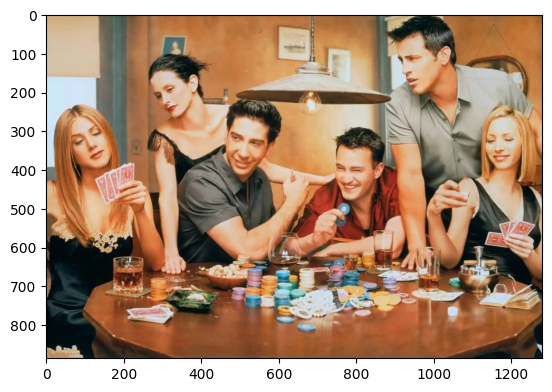

In [8]:
plt.imshow(img[:,:,::-1])

In [9]:
plt.show()

# Detección de las caras

In [10]:
faces = app.get(img)

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


In [11]:
len(faces)

6

In [12]:
faces[0].keys()

dict_keys(['bbox', 'kps', 'det_score', 'landmark_3d_68', 'pose', 'landmark_2d_106', 'gender', 'age', 'embedding'])

# Mostramos las caras

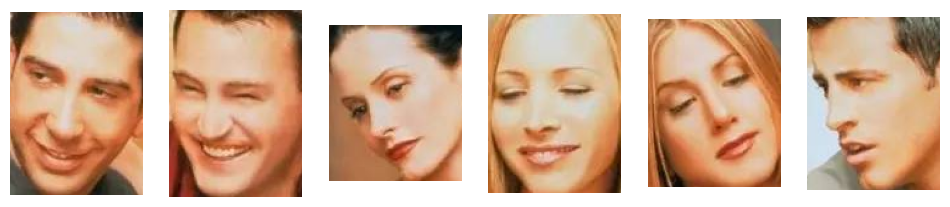

In [13]:
fig, axs = plt.subplots(1, 6,  figsize=(12,5))

for i, face in enumerate(faces):
    bbox = face["bbox"]
    bbox = [int(b) for b in bbox]
    axs[i].imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
    axs[i].axis("off")

## Intercambio de las caras

In [14]:
from google.colab import drive

In [15]:
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
!cp './drive/MyDrive/Colab Notebooks/inswapper_128.onnx' .

In [17]:
# Se carga el modelo de intercambio de caras
swapper = insightface.model_zoo.get_model("./inswapper_128.onnx",
                                          download=False,
                                          download_zip=False)

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
inswapper-shape: [1, 3, 128, 128]


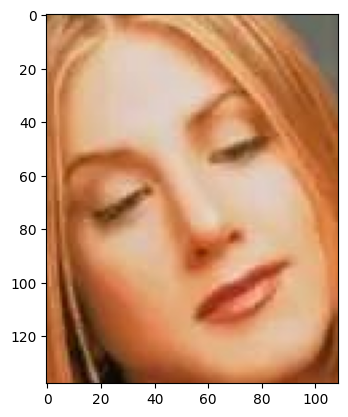

In [19]:
# Elegimos la cara 4
source_face = faces[4]
bbox = source_face["bbox"]
bbox = [int(b) for b in bbox]
plt.imshow(img[bbox[1]:bbox[3], bbox[0]:bbox[2], ::-1])
plt.show()

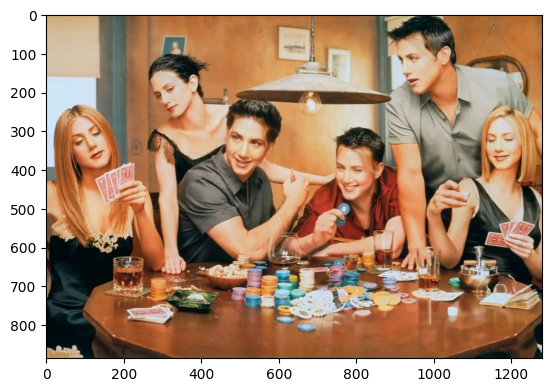

In [20]:
res = img.copy()
for face in faces:
    res = swapper.get(res, face, source_face, paste_back=True)


plt.imshow(res[:,:,::-1])

## Caras Intercambiadas

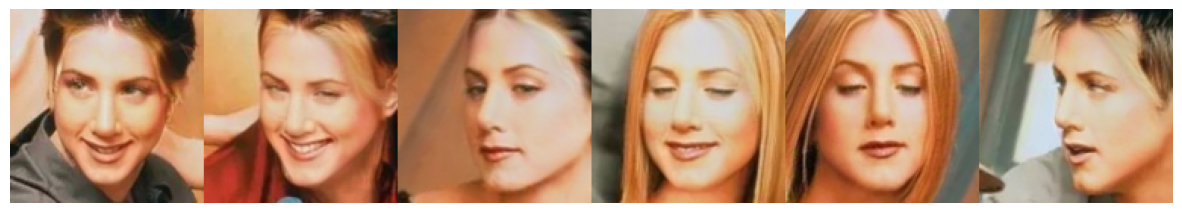

In [21]:
res = []
for face in faces:
    _img, _ = swapper.get(img, face, source_face, paste_back=False)
    res.append(_img)

res = np.concatenate(res, axis=1)
fig, ax = plt.subplots(figsize=(15, 5))
ax.imshow(res[:,:,::-1])
ax.axis('off')
plt.show()

## Prueba con una imagen de nuestra elección

In [22]:
!cp './drive/MyDrive/Colab Notebooks/cr7.jpg' .

In [26]:
rob = cv2.imread('cr7.jpg')

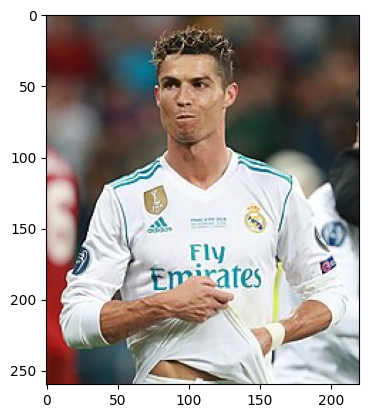

In [27]:
plt.imshow(rob[:,:,::-1])
plt.show()

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


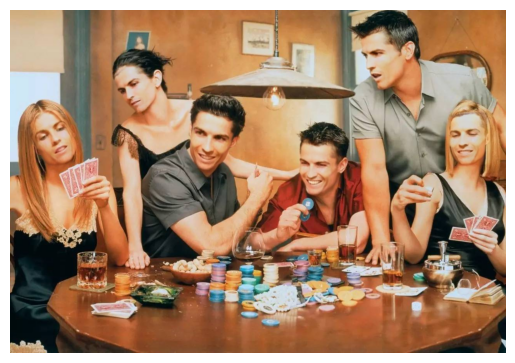

In [30]:
rob_faces = app.get(rob)
rob_face = rob_faces[0]
res = img.copy()

for face in faces:
    res = swapper.get(res, face, rob_face, paste_back=True)

fig, ax = plt.subplots()
ax.imshow(res[:,:,::-1])
ax.axis("off")
plt.show()